# Implementation of a Perceptron Learning Algorithm

A class approach which allows to initialize new perceptron will be used. A method fit will be used to train the weights of the perceptron and a separate method predict will be used "predict". 
As a convention an underscore is added to attributes that are not being created upon initialization of the object, but are created when another method of the object is called. (e.g: self.w_.)

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Perceptron (object):
    """ Perceptron classifier
    
    Parameters
    -------------------------
    eta: float 
         Learning rate (between 0.0 and 1.0)

    n_iter: int 
            Passes over training dataset
            
    
    Attributes
    ------------------------
    w_: 1d_array
        weights after fitting 
        
    errors_: list 
             Number of misclassifications in every epochs. 
    """
    def __init__(self, eta = .01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data 
        
        Parameters
        ----------------------
        X:{array-like}, shape = [n_samples, n_features]
          Training vectors where n_samples is the number of samples and 
          n_features is the number of features 
        
        y: array-like, shape = [n_samples]
           Target values
           
        Returns
        -----------------------
        self: object 
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update 
                errors += int(update != 0)
            self.errors_.append(errors)
        return self 
    
    def net_input(self, X):
        """
        Calculate net input 
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """ Return the class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Training the perceptron model on the iris dataset

## Read dataset from online server

In [44]:
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/'
                       'machine-learning-databases/iris/iris.data', header = None)
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualization of the datasets
##### Read and transform the data for visualization purposes

In [45]:
# Use iloc to identify the 100 first entries of the matrix and select the response id 
y = iris_data.iloc[0:100, 4].values
# use np.where to fill the response vector with 1 or -1 for classification purposes with the perceptron 
y = np.where(y == 'Iris-setosa', -1, 1)

X = iris_data.iloc[0:100, 0:2].values

#### Plot the petal length and the sepal length 

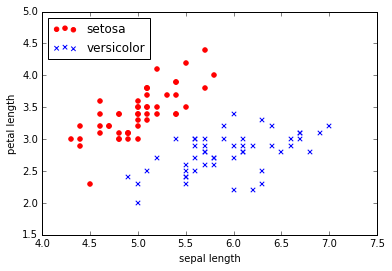

In [46]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')

#### Training of the perceptron on the iris data set

In [53]:
ppn_iris_data = Perceptron(eta = .01, n_iter = 15)

# training of the Perceptron model on the iris data set 
ppn_iris_data.fit(X, y)

#### Plot the evolution of the errors 

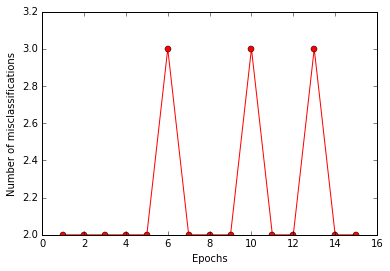

In [54]:
plt.plot(range(1, len(ppn_iris_data.errors_) + 1), ppn_iris_data.errors_, marker = 'o', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

#### Visualization of the obtained clusters 

In [55]:
from matplotlib.colors import ListedColormap

In [56]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors  = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap    = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    
    # np.ravel returns a flattened contiguous object
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], 
                    alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)

In [57]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        print cl
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

-1
1


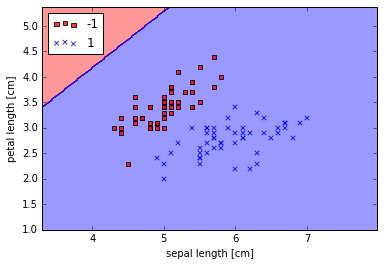

In [58]:
plot_decision_regions(X, y, classifier = ppn_iris_data)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

# Implementation of an Adaptive Learning Neuron 

In [68]:
class AdalineGD(object):
    """ADAptive LInear NEuron Classifier.
    Parameters
    --------------------------
    eta: float (learning rate between 0.0  and 1.0)
    n_iter: number of passes over the dataset
    
    Attributes:
    --------------------------
    w_: 1d-array weights after fitting 
    errors_: list (Number of misclassifications in every epoch)
    """
    
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter 
    
    def fit(self, X, y):
        """
        Fit training data 
    
        Parameters
        ----------------------------
        X :{array-like}, shape = [n_samples, n_features]
           training vectors where n_samples is the number of samples and n_features is the number of features 
        y : array-like, shape =[n_samples] target values
    
        Returns 
        ----------------------------
        self: object
        """
    
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
    
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """calculate the linear combination between the weights and the input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """ Return the class after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

#### Experimentation with multiple learning rates 

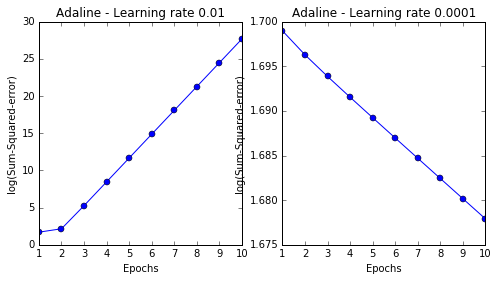

In [70]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ada1    = AdalineGD(n_iter = 10, eta =0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-Squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()


#### Standardization of the input matrix for faster convergence 
Since the problem is better conditioned 

In [72]:
X_std = np.copy(X)
X_std[:,0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:,1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

Retrain the adaline model 

-1
1


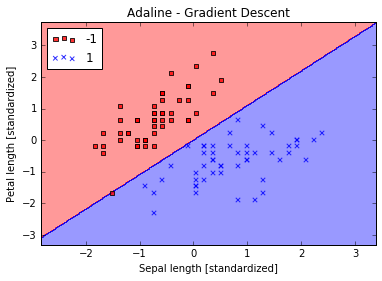

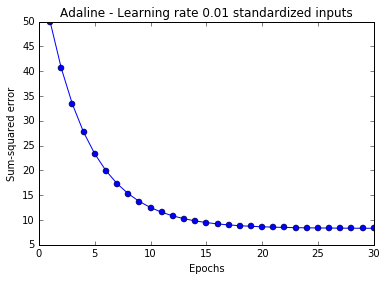

In [77]:
ada = AdalineGD(n_iter = 30, eta = 0.001)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared error')
plt.title('Adaline - Learning rate 0.01 standardized inputs')

# Stochastic Gradient Descent for Large Scale cases

In [89]:
class AdalineSGD(object):
    """ ADAptive LInear NEuron classifier
    
    Parameters
    -------------------------------------
    eta: float Learning rate (0.0 and 1.0)
    
    n_iter: int (number of times we go through the entire dataset)
    
    Attributes:
    ---------------------------------------
    w_: 1d-array 
    
    errors_: list (number of misclassifications in each epoch)
    
    shuffle: bool (default True) shuffles training set in every epoch
    
    random_state: int (default None) set random state for shuffling and initializing the weights 
    """
    
    def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter 
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            self.random_state = random_state
            
    def fit(self, X, y):
        """Fit training data"""
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        
        if not self.w_initialized:
            self._initialized_weights(X.shape[1])
        
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zero"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error  = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0]  += self.eta *error 
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
         

#### Let's use the ADALine stochastic gradient descent class

-1
1


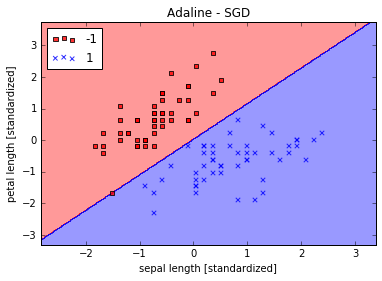

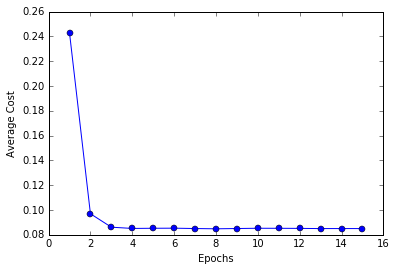

In [88]:
ada_sgd = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ada_sgd)
plt.title('Adaline - SGD')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()